# DATA 2060 Project

### Summary:
This project builds and evaluates a Gaussian Naive Bayes classification model for a real-world prediction task. The report is structured in four main parts. First, it explains the mathematical foundation of the model, including Bayes’ Theorem, the independence assumption, and the Gaussian distribution used for continuous features. Next, it walks through the implementation of the model, covering model construction, training and prediction using only Numpy and python by ourselves instead of using scikit-learn. The model is then tested using both unit tests and labeled datasets to verify correctness and measure prediction accuracy. Finally, the report concludes with proper academic citations to support the methods and theory used throughout the project.

#1.Model Overview
# **Naive Bayes Overview**

Naive Bayes (NB) is a simple **probabilistic classification algorithm** based on **Bayes’ theorem** and the assumption that features are **conditionally independent** given the class label. [1]

## How the Algorithm Works

### 1. Training Phase
NB learns two sets of probabilities from the training data:

- **Class prior:**  
  $$
  P(y=k) = \frac{\text{\# of samples in class } k}{\text{total \# of samples}}
  $$

- **Feature likelihood:**  
  For each feature $x_j$ and class $k$,
  $$
  P(x_j=a \mid y=k) = \frac{\text{count}(x_j=a,\,y=k)+1}{\text{count}(y=k)+m}
  $$
  where $m$ is the number of possible feature values.  
  *(The “+1” term is Laplace smoothing to avoid zero probabilities.)*

These probabilities are stored and used for prediction; there is **no iterative optimization**.

### 2. Prediction Phase
Given a new sample $x=(x_1,\dots,x_d)$, NB computes a **posterior probability** for each class:

$$
P(y=k \mid x) \propto P(y=k)\prod_{j=1}^{d} P(x_j \mid y=k)
$$

and predicts the class with the highest posterior:

$$
\hat{y} = \arg\max_k \Big[ P(y=k)\prod_j P(x_j \mid y=k) \Big]
$$

---

### Example (with Laplace Smoothing)

| Weather | Temperature | Play Tennis |
|:--:|:--:|:--:|
| Sunny | Hot | No |
| Sunny | Mild | Yes |
| Rainy | Mild | Yes |

- $P(\text{Yes}) = \tfrac{2}{3}$, $P(\text{No}) = \tfrac{1}{3}$  
- Assume each feature has $m=3$ possible values.  
- $P(\text{Sunny} \mid \text{Yes}) = \tfrac{1+1}{2+3} = \tfrac{2}{5}$, $P(\text{Mild} \mid \text{Yes}) = \tfrac{1+1}{2+3} = \tfrac{2}{5}$  
- $P(\text{Sunny} \mid \text{No}) = \tfrac{1+1}{1+3} = \tfrac{1}{2}$, $P(\text{Mild} \mid \text{No}) = \tfrac{0+1}{1+3} = \tfrac{1}{4}$  

For a new day (Sunny, Mild):

$$
P(\text{Yes}\mid x)\propto\left(\tfrac{2}{3}\right)\left(\tfrac{2}{5}\right)\left(\tfrac{2}{5}\right)=\tfrac{8}{75},
\quad
P(\text{No}\mid x)\propto\left(\tfrac{1}{3}\right)\left(\tfrac{1}{2}\right)\left(\tfrac{1}{4}\right)=\tfrac{1}{24}
$$

**Prediction:** Yes

---

## Advantages
1. **Fast and interpretable** — Training requires only counting frequencies; no gradient descent or tuning.  
2. **Effective with small data** — Performs well even with limited training samples.

## Disadvantages
1. **Discrete-feature limitation** — Standard NB assumes categorical inputs; for continuous variables, we must use **Gaussian NB**, which changes the likelihood model.  
2. **Distributional assumptions of X** — NB assumes conditional independence and that feature distributions match the chosen model. Strong feature correlations or mismatched distributions can degrade accuracy.
[2]

# **Solution: Gaussian Naive Bayes (GNB)**

#### How GNB Addresses NB’s Limitations
- **Discrete-feature limitation:** GNB handles continuous data by assuming each feature follows a **Gaussian (Normal) distribution** within each class.  
- **Distributional assumption:** Instead of counting frequencies, it models **probability densities** using normal distribution with the feature’s **mean** and **variance**, improving generalization.

---

### Representation

Each feature \( x_j \) for class \( y = k \) is modeled as:[1]

$$
P(x_j \mid y=k) = \frac{1}{\sqrt{2\pi\sigma_{jk}^2}}
\exp\left(-\frac{(x_j - \mu_{jk})^2}{2\sigma_{jk}^2}\right)
$$

During prediction, GNB computes:

$$
P(y=k \mid x) \propto P(y=k)\prod_{j=1}^{d} P(x_j \mid y=k)
$$

and predicts:

$$
\hat{y} = \arg\max_k \; P(y=k)\prod_j P(x_j \mid y=k)
$$

---

### Pseudocode — Gaussian Naive Bayes (GNB)

**Inputs**
- Training data: features **X ∈ ℝⁿˣᵈ**, labels **y ∈ {1, …, K}**

#### **Training Phase**

1. For each class **k ∈ {1, …, K}**:
   - Collect all samples belonging to class *k*:  
     **Iₖ = { i | yᵢ = k }**
   - Compute:
     - Prior probability:  
       **P(y = k) = |Iₖ| / n**
     - Mean and variance for each feature **j ∈ {1, …, d}**:  
       **μₖⱼ = mean(X[Iₖ, j])**  
       **σₖⱼ² = var(X[Iₖ, j])**

#### **Prediction Phase**

1. For a new sample **x = (x₁, x₂, …, x_d)**:
   - For each class **k ∈ {1, …, K}**, compute:
     - Likelihood under the Gaussian assumption:  
       **P(x | y = k) = ∏ⱼ [ 1 / √(2πσₖⱼ²) * exp( −(xⱼ − μₖⱼ)² / (2σₖⱼ²) ) ]**
   - Combine with the class prior:  
       **P(y = k | x) ∝ P(y = k) × P(x | y = k)**
   - Predict the class with the highest posterior probability:  
       **ŷ = argmaxₖ P(y = k | x)**

---


#### Example

| Temperature | Play Tennis |
|:--:|:--:|
| 80 | Yes |
| 85 | Yes |
| 72 | No |
| 60 | No |

$$
P(\text{Yes}) = P(\text{No}) = 0.5
$$

$$
\mu_{\text{Yes}} = 82.5, \quad \sigma_{\text{Yes}}^2 = 6.25
$$

$$
\mu_{\text{No}} = 66, \quad \sigma_{\text{No}}^2 = 36
$$

For a new day with \( x = 70 \):

$$
P(x=70 \mid \text{Yes}) =
\frac{1}{\sqrt{2\pi(6.25)}}
\exp\left(-\frac{(70 - 82.5)^2}{2(6.25)}\right)
\approx 0.003
$$

$$
P(x=70 \mid \text{No}) =
\frac{1}{\sqrt{2\pi(36)}}
\exp\left(-\frac{(70 - 66)^2}{2(36)}\right)
\approx 0.064
$$

**Prediction:** No (since 70 is closer to 66)

---
**Advantage and Disadvantage**
#### Advantages
1. **Handles continuous data without discretization**  
   Gaussian Naive Bayes models continuous features directly using a normal distribution, avoiding information loss from converting data into discrete bins.

2. **Fast and simple — computes only mean and variance**  
   Training is very efficient because it only estimates the mean and variance for each feature in each class, with no iterative optimization required.

3. **Works well with small datasets**  
   Since only a few parameters are estimated, GNB can perform well even when the amount of training data is limited.

#### Disadvantages
1. **Assumes Gaussian distribution for features**  
   If the true feature distributions are far from normal, the model’s probability estimates may be inaccurate.

2. **Still assumes feature independence**  
   Correlations between features violate the independence assumption and can reduce prediction accuracy.

3. **Sensitive to outliers**  
   Outliers can strongly affect the mean and variance estimates, leading to unstable predictions [2].
---


### Loss and Optimizer

- **Reason:** GNB is a **generative model**, which estimates \( P(x|y) \) and \( P(y) \) directly rather than learning a decision boundary.  
- **Loss:** While GNB is typically derived from probabilistic reasoning rather than direct optimization, it can be interpreted as minimizing the **negative log-likelihood (NLL)**:

\begin{align*}
\mathcal{L}(\theta) = -\frac{1}{N}\sum_{n=1}^{N} \log P(y^{(n)} \mid \mathbf{x}^{(n)}; \theta)
\end{align*}

where $\theta = \{\mu_{y,i}, \sigma_{y,i}^2, P(y)\}$ are the parameters estimated from the training data.
Minimizing NLL encourages the model to assign high probability to the true class labels. This loss aligns closely with **cross-entropy loss** used in logistic regression. Hence, even though GNB is not optimized iteratively, its learning process can still be viewed as solving a likelihood-based optimization problem with an analytical solution.


- **Optimizer:** GNB does not use gradient descent or iterative optimization.  
Instead, it employs a **closed-form Maximum Likelihood Estimation (MLE)** for parameter estimation:

\begin{align*}
\hat{P}(y) = \frac{\text{count}(y)}{N}, \quad
\hat{\mu}_{y,i} = \frac{1}{N_y}\sum_{x_j \in y} x_{j,i}, \quad
\hat{\sigma}_{y,i}^2 = \frac{1}{N_y}\sum_{x_j \in y} (x_{j,i} - \hat{\mu}_{y,i})^2
\end{align*}


#2. Model

In [ ]:
import numpy as np

class TeamGaussianNB:
    def __init__(self, priors=None, var_smoothing=1e-9):
        """
        Initialize a Gaussian Naive Bayes classifier.

        @param priors: Optional list or array of class prior probabilities.
                       If None, priors are computed from the data.
        @param var_smoothing: Small value added to variances for numerical stability.
        @return: None
        """
        self.priors = priors
        self.var_smoothing = var_smoothing
        self.classes_ = None
        self.class_means = None
        self.class_vars = None
        self.class_priors = None

    def fit(self, X, y):
        """
        Fit the Gaussian Naive Bayes classifier by computing class means,
        variances, and prior probabilities from the training data.

        @param X: Training inputs, a 2D numpy array of shape (n_samples, n_features)
        @param y: Training labels, a 1D numpy array of shape (n_samples,)
        @return: self
        """
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        self.class_means = np.zeros((n_classes, n_features))
        self.class_vars = np.zeros((n_classes, n_features))
        self.class_priors = np.zeros(n_classes)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            n_c = X_c.shape[0]

            if self.priors is None:
                self.class_priors[idx] = n_c / n_samples
            else:
                self.class_priors = np.array(self.priors)
                self.class_priors = self.class_priors / np.sum(self.class_priors)

            self.class_means[idx] = X_c.mean(axis=0)
            self.class_vars[idx] = X_c.var(axis=0) + self.var_smoothing * np.max(X_c.var(axis=0))

        return self

    def _joint_log_likelihood(self, X):
        """
        Compute the joint log-likelihood of each sample under each class.

        @param X: Input data, a numpy array of shape (n_samples, n_features)
        @return: A 2D numpy array of shape (n_samples, n_classes) containing
                 the joint log likelihood values.
        """
        X = np.array(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        jll = np.zeros((n_samples, n_classes))

        for idx in range(n_classes):
            mean = self.class_means[idx]
            var = self.class_vars[idx]
            log_prior = np.log(self.class_priors[idx])
            log_likelihood = -0.5 * np.sum(
                np.log(2 * np.pi * var) + ((X - mean) ** 2) / var,
                axis=1
            )
            jll[:, idx] = log_prior + log_likelihood

        return jll

    def predict(self, X):
        """
        Predict the class labels for the given input samples.

        @param X: Input data, a 2D numpy array of shape (n_samples, n_features)
        @return: A 1D numpy array containing predicted class labels.
        """
        jll = self._joint_log_likelihood(X)
        indices = np.argmax(jll, axis=1)
        return self.classes_[indices]

    def predict_proba(self, X):
        """
        Predict class probabilities for the given input samples.

        @param X: Input data, a 2D numpy array of shape (n_samples, n_features)
        @return: A 2D numpy array of shape (n_samples, n_classes) containing
                 the predicted probabilities for each class.
        """
        jll = self._joint_log_likelihood(X)

        max_jll = np.max(jll, axis=1, keepdims=True)
        log_probs = jll - max_jll

        probs_unnorm = np.exp(log_probs)
        probs = probs_unnorm / np.sum(probs_unnorm, axis=1, keepdims=True)

        return probs

    def score(self, X, y):
        """
        Compute the classification accuracy on the given test data.

        @param X: Test inputs, a 2D numpy array
        @param y: True labels, a 1D numpy array
        @return: A float representing the accuracy.
        """
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


#3. Check model

##3.1 Unit Test

In [ ]:
import pytest
X1 = np.array([
    [1.0, 2.0],
    [1.2, 1.9],
    [3.5, 4.0],
    [3.7, 3.8],
    [1.1, 2.2]
])
y1 = np.array([0, 0, 1, 1, 0])

X1_test = np.array([
    [1.0, 2.1],
    [3.6, 3.9],
    [1.4, 2.0]
])
y1_test = np.array([0, 1, 0])


X2 = np.array([
    [0, 1],
    [0, 0.8],
    [2, 2],
    [2.2, 1.8],
    [0.1, 0.9],
    [2.1, 2.1]
])
y2 = np.array([0, 0, 1, 1, 0, 1])

X2_test = np.array([
    [0, 1.0],
    [2.2, 1.9],
    [0.05, 0.95],
    [1.9, 2.2]
])
y2_test = np.array([0, 1, 0, 1])


model1 = TeamGaussianNB()
model2 = TeamGaussianNB()


model1.fit(X1, y1)
model2.fit(X2, y2)

# Check classes
assert (model1.classes_ == np.array([0, 1])).all()
assert (model2.classes_ == np.array([0, 1])).all()

#   Test Means & Variances
assert model1.class_means[0] == pytest.approx([1.1, 2.03333], 0.001)
assert model1.class_means[1] == pytest.approx([3.6, 3.9], 0.001)

assert model2.class_means[0] == pytest.approx([0.03333, 0.9], 0.01)
assert model2.class_means[1] == pytest.approx([2.1, 1.966], 0.01)


#   Test Priors
assert model1.class_priors == pytest.approx([3/5, 2/5], 0.001)
assert model2.class_priors == pytest.approx([3/6, 3/6], 0.001)

#   Test Joint Log Likelihood
jll1 = model1._joint_log_likelihood(X1_test)
assert jll1.shape == (3, 2)
assert jll1.dtype == np.float64

jll2 = model2._joint_log_likelihood(X2_test)
assert jll2.shape == (4, 2)
assert jll2.dtype == np.float64

#   Test Predict
pred1 = model1.predict(X1_test)
assert (pred1 == np.array([0, 1, 0])).all()

pred2 = model2.predict(X2_test)
assert (pred2 == np.array([0, 1, 0, 1])).all()

#   Test Score
assert model1.score(X1_test, y1_test) == 1.0
assert model2.score(X2_test, y2_test) == 1.0

#3.2 Dataset Application

### Dataset Description

In this project, we use the *Diabetes Dataset* from Kaggle, which contains 768 patient records with 9 medical continous features such as glucose level, blood pressure, BMI, insulin level, and pregnancy count, along with a binary **Outcome** variable indicating whether the patient is diabetic. This dataset is widely used for binary classification tasks and is well-structured, making it an appropriate choice for evaluating the performance of our **Gaussian Naive Bayes** model.[3]


0. Import Libraries

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

1. Import Dataset

In [ ]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data.drop('Pregnancies', axis=1))
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


2. Dataset Min_Max Preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df)
df2 = pd.DataFrame(df2, columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [ ]:
df2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


3. Train/Test Split

In [ ]:
X = pd.DataFrame(df2.drop('Outcome', axis=1))
y = df2['Outcome'].values.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

4. Train Sklearn GNB Model

In [ ]:
Sklearn_model = GaussianNB()
Sklearn_model.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
Sklearn_y_pred = Sklearn_model.predict(X_test)

5. Custom  GNB Model

In [ ]:
Custom_model = TeamGaussianNB()
Custom_model.fit(X_train, y_train.ravel())   # 👈 flatten y to (614,)


In [ ]:
Custom_y_pred = Custom_model.predict(X_test)



6. Model Performance

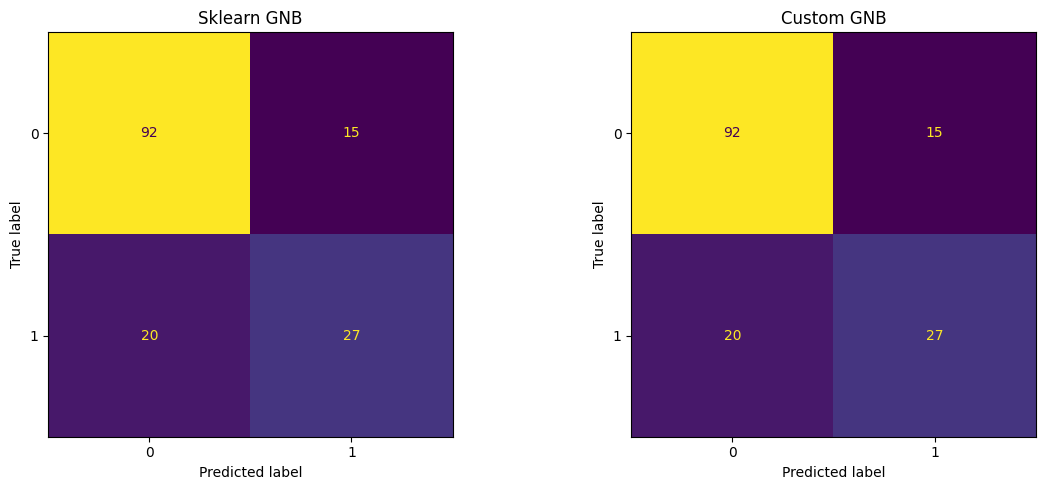

Performance metrics:


,Accuracy,Precision,Recall,F1 Score
Sklearn GNB,0.772727,0.642857,0.574468,0.606742
Custom GNB,0.772727,0.642857,0.574468,0.606742



Do both models make exactly the same predictions? True

Are all metric values identical between the two models?
Accuracy     True
Precision    True
Recall       True
F1 Score     True
dtype: bool


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Make sure y_test is 1-D
y_true = np.ravel(y_test)

# 1. Confusion matrices in 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

models = [
    ("Sklearn GNB", Sklearn_y_pred),
    ("Custom GNB", Custom_y_pred)
]

for ax, (name, y_pred) in zip(axes, models):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()

# 2. Compute metrics for each model
metrics_dict = {}

for name, y_pred in models:
    metrics_dict[name] = {
        "Accuracy":  accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall":    recall_score(y_true, y_pred),
        "F1 Score":  f1_score(y_true, y_pred)
    }

metrics_df = pd.DataFrame(metrics_dict).T  # models as rows
print("Performance metrics:")
display(metrics_df)

# 3. Check if the models match
print("\nDo both models make exactly the same predictions?",
      np.array_equal(Sklearn_y_pred, Custom_y_pred))

print("\nAre all metric values identical between the two models?")
print(metrics_df.eq(metrics_df.iloc[0]).all())


##4. References

[1] Scikit-learn (n.d.) *Naive Bayes*. Available at:  
https://scikit-learn.org/stable/modules/naive_bayes.html  
(Accessed: 5 December 2025).

[2] GeeksforGeeks (n.d.) *Naive Bayes Classifiers*. Available at:  
https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/  
(Accessed: 5 December 2025).

[3].Kaggle (n.d.) *Diabetes Dataset*. Available at:  
https://www.kaggle.com/datasets/hashemi221022/diabetes/data  
(Accessed: 5 December 2025).